In [1]:
import networkx as nx
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
import codecs
import json
import itertools
import operator

In [2]:
#Loading to a dictonary and creating a directed graph
with codecs.open("./Data/data_final.txt", 'r', "utf-8") as f:
    artist_data = json.load(f)

In [3]:
G = nx.DiGraph()

In [5]:
for artist in artist_data:
    if artist in artist_data[artist][2]:
        print(artist)

03 greedo
070 shake
1.cuz
100 kila
12 gauge
2 black 2 strong
2 chainz
2 pistols
20syl
21 savage
22gz
24hrs
24kgoldn
2baba
2mex
30 roc
347aidan
38 spesh
3d na'tee
4th disciple
40 glocc
42 dugg
5ft
50 cent
60 second assassin
6ix9ine
6lack
the 6th letter
808melo
88camino
88-keys
9ice
9lokknine
9th prince
9th wonder
a boogie wit da hoodie
a.chal
a.d.o.r.
a.l.t.
a-reece
aaliyah
ab-soul
abena rockstar
abdominal
abra cadabra
abraham mateo
abstract rude
ace hood
aceyalone
action bronson
ad-rock
adam calhoun
adam saleh
adán zapata
add-2
adrian marcel
aesop rock
affion crockett
afrika bambaataa
afroman
afu-ra
agallah
aitch
aj tracey
ajs nigrutin
akthesavior
akala
akhenaton
akinyele
akon
akrobatik
al b. sure!
al kapone
the alchemist
alex wiley
alexandra reid
ali shaheed muhammad
ali vegas
alison goldfrapp
allan kingdom
almighty jay
aloe blacc
alonzo
alpa gun
alpha wann
alvin risk
amg
amanda blank
amerado
ambush buzzworl
amil
aminé
ampichino
amplify dot
ana diaz
anderson .paak
andré 3000
andre har

In [6]:
exceptions = []
for artist in artist_data:
    G.add_node(artist)
    try:
        for featured_artist in artist_data[artist][2]:
            if featured_artist in artist_data and featured_artist != artist:
                G.add_edge(artist, featured_artist)
    except:
        exceptions.append(artist)

In [7]:
exceptions

[]

In [8]:
#Calculating different statistics
indegree_distribution      = sorted((d for n, d in G.in_degree()), reverse=True)
outdegree_distribution     = sorted((d for n, d in G.out_degree()), reverse=True)
#undirectional_distribution = sorted((d for n, d in G_undirectional.degree()), reverse=True)
indegree_mean              = np.mean(indegree_distribution)
outdegree_mean             = np.mean(outdegree_distribution)
indegree_median            = np.median(indegree_distribution)
outdegree_median           = np.median(outdegree_distribution)
indegree_mode              = max(set(indegree_distribution), key=indegree_distribution.count)
outdegree_mode             = max(set(outdegree_distribution), key=outdegree_distribution.count)
indegree_min               = min(indegree_distribution)
outdegree_min              = min(outdegree_distribution)
indegree_max               = max(indegree_distribution)
outdegree_max              = max(outdegree_distribution)

In [32]:
G.in_degree

InDegreeView({'03 greedo': 29, 'buddy': 56, 'kenny beats': 35, 'chief keef': 130, 'pnb rock': 133, 'vince staples': 112, 'sada baby': 88, 'travis barker': 75, 'nef the pharaoh': 34, 'rich the kid': 140, 'yg': 242, 'key glock': 66, 'wiz khalifa': 354, 'og maco': 19, 'freddie gibbs': 129, 'problem': 89, 'yung bans': 22, 'omb peezy': 25, 'maxo kream': 43, '070 shake': 41, 'yandel': 55, 'kaytranada': 29, 'polo g': 99, 'the weeknd': 191, 'lil yachty': 211, '6lack': 140, 'big sean': 264, 'anderson .paak': 147, 'benee': 63, 'benny blanco': 30, 'anuel aa': 66, 'billie eilish': 94, 'skrillex': 62, 'j balvin': 208, 'k camp': 95, 'nle choppa': 157, 'megan thee stallion': 189, 'tion wayne': 113, 'lancey foux': 17, '1.cuz': 8, 'dani m': 18, 'stor': 14, 'cleo': 11, 'yasin': 17, 'stress': 24, 'jireel': 20, 'einár': 13, 'greekazo': 6, 'lil baby': 314, 'linda pira': 13, 'fricky': 12, 'dree low': 8, '100 kila': 1, 'rick ross': 345, '12 gauge': 2, 'snak the ripper': 23, 'getter': 9, 'napoleon': 32, 'jae 

In [9]:
print('Outdegree:', f'mean={outdegree_mean},', f'minimum={outdegree_min},', f'max={outdegree_max},', f'mode={outdegree_mode}')
print('Indegree:', f'mean={indegree_mean},', f'minimum={indegree_min},', f'max={indegree_max},', f'mode={indegree_mode}')

Outdegree: mean=29.530575539568346, minimum=0, max=218, mode=0
Indegree: mean=29.530575539568346, minimum=0, max=522, mode=0


In [7]:
indegree_dist = dict([(degree[0], len(list(degree[1]))) for degree in itertools.groupby(indegree_distribution)])
outdegree_dist = dict([(degree[0], len(list(degree[1]))) for degree in itertools.groupby(outdegree_distribution)])

In [33]:
def plot_degrees(x, y, title, xaxis, yaxis='Frequency (Count)', figsize=(10, 7)):
    plt.figure(figsize=figsize)
    plt.loglog(x, y, color='r', linestyle='None', markersize = 10.0, marker='o')
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.show()

In [30]:
indegree_dist

{523: 1,
 403: 1,
 373: 1,
 354: 1,
 345: 1,
 336: 1,
 334: 1,
 314: 1,
 311: 1,
 304: 1,
 273: 1,
 268: 1,
 267: 1,
 264: 1,
 256: 1,
 255: 1,
 251: 1,
 248: 3,
 245: 1,
 242: 2,
 240: 2,
 239: 1,
 238: 1,
 237: 1,
 236: 1,
 233: 1,
 231: 1,
 230: 1,
 229: 1,
 228: 1,
 225: 1,
 223: 1,
 220: 3,
 218: 1,
 217: 1,
 216: 1,
 215: 2,
 213: 1,
 212: 1,
 211: 1,
 208: 1,
 207: 1,
 204: 2,
 203: 2,
 202: 1,
 201: 1,
 200: 1,
 199: 2,
 195: 1,
 194: 1,
 193: 1,
 191: 2,
 189: 1,
 187: 1,
 186: 2,
 184: 2,
 183: 1,
 181: 1,
 180: 1,
 178: 1,
 177: 1,
 174: 1,
 172: 2,
 171: 2,
 170: 1,
 169: 2,
 164: 2,
 163: 1,
 159: 1,
 157: 5,
 156: 3,
 154: 2,
 153: 3,
 152: 1,
 150: 2,
 149: 2,
 148: 4,
 147: 2,
 146: 1,
 145: 1,
 141: 1,
 140: 5,
 139: 1,
 138: 1,
 135: 1,
 133: 4,
 132: 3,
 131: 3,
 130: 2,
 129: 3,
 128: 3,
 126: 1,
 125: 1,
 124: 3,
 123: 1,
 122: 3,
 121: 4,
 120: 3,
 119: 3,
 118: 2,
 117: 1,
 116: 4,
 115: 2,
 114: 4,
 113: 2,
 112: 4,
 111: 6,
 110: 2,
 109: 2,
 108: 2,
 107: 3,
 

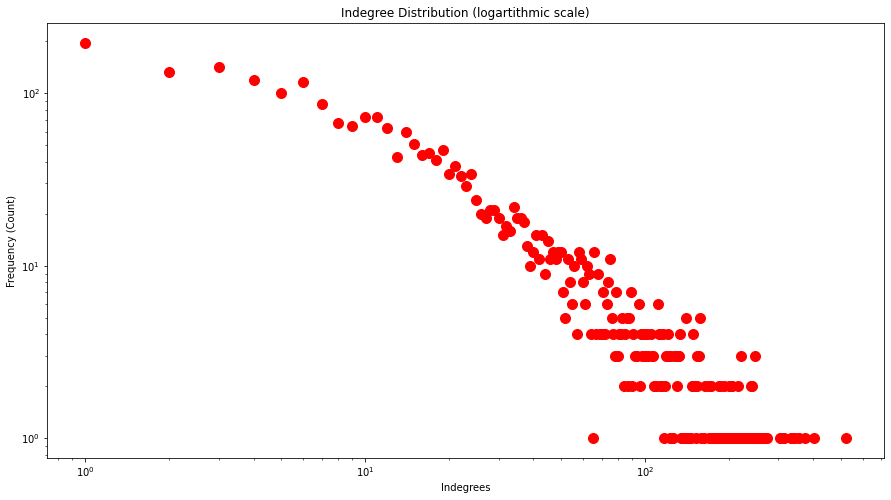

In [37]:
plot_degrees(indegree_dist.keys(), indegree_dist.values(), title='Indegree Distribution (logartithmic scale)', xaxis='Indegrees', figsize=(15, 8))

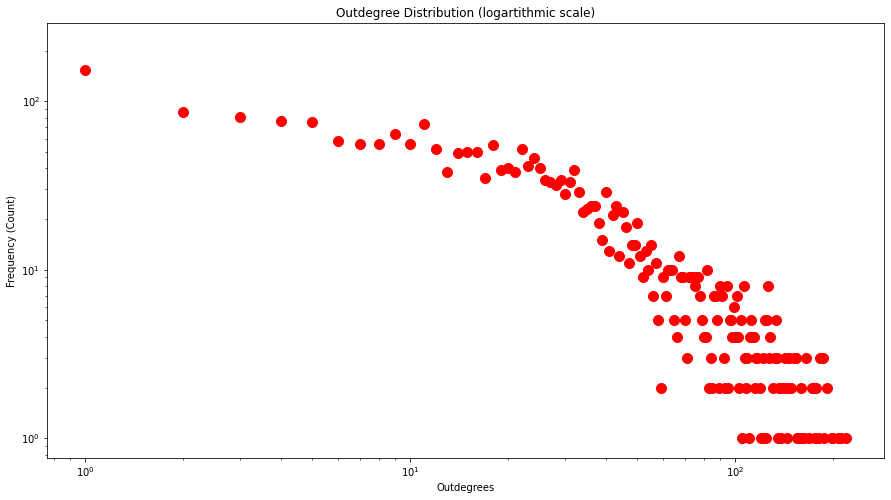

In [36]:
plot_degrees(outdegree_dist.keys(), outdegree_dist.values(), title='Outdegree Distribution (logartithmic scale)', xaxis='Outdegrees', figsize=(15, 8))

In [11]:
print(sorted(G.in_degree, key=lambda x: x[1], reverse=True)[:10])
print(sorted(G.out_degree, key=lambda x: x[1], reverse=True)[:10])


[('snoop dogg', 523), ('lil wayne', 403), ('gucci mane', 373), ('wiz khalifa', 354), ('rick ross', 345), ('busta rhymes', 336), ('2 chainz', 334), ('lil baby', 314), ('future', 311), ('e-40', 304)]
[("lil' cease", 219), ('mos def', 211), ('sheck wes', 207), ('treach', 199), ('rah digga', 198), ('memphis bleek', 191), ('i-20', 191), ('playboi carti', 187), ('inspectah deck', 186), ('slick rick', 186)]


We can see that Snoop Dogg has the highest centrality in terms of indegrees while lil cease seems to be the topper for the out degrees. We will now check some of the other centrality measures to see if they yield other interesting results.
To give a quick comment on the degree distribution - a quick look at Snoop Dogg shows that he is one of the all time greats and has been in the Hip Hop industry since the very beggining. It therefore makes sense that he is one of the most featured artists since he has been in the game the longest. 

In [160]:
#Betweness Centrality
betweness_centrality = nx.betweenness_centrality(G)

In [169]:
betweness_centrality
max_betweness_centrality = max(betweness_centrality.items(), key=operator.itemgetter(1))[0]
print(max_betweness_centrality, betweness_centrality[max_betweness_centrality])

snoop dogg 0.0202858941299738


We can see that snoopdogg is the artist with the highest measure of betweness centrality. This means 

In [173]:
closeness_centrality = nx.closeness_centrality(G)
max_closeness_centrality = max(closeness_centrality.items(), key=operator.itemgetter(1))[0]
print(max_closeness_centrality, closeness_centrality[max_closeness_centrality])

snoop dogg 0.44529846732870676


We can see that Snoop Dogg is again the hip hop artist with the highest closeness centrality. This means that Snoop Dogg is closest 

In [183]:
outdegree_dist[0]

222

In [38]:
import networkx.algorithms.community as nxcom

# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

# Count the communities
print(f"The graph has {len(communities)} communities.")

The graph has 220 communities.


In [12]:
graph_pos = nx.spring_layout(G)

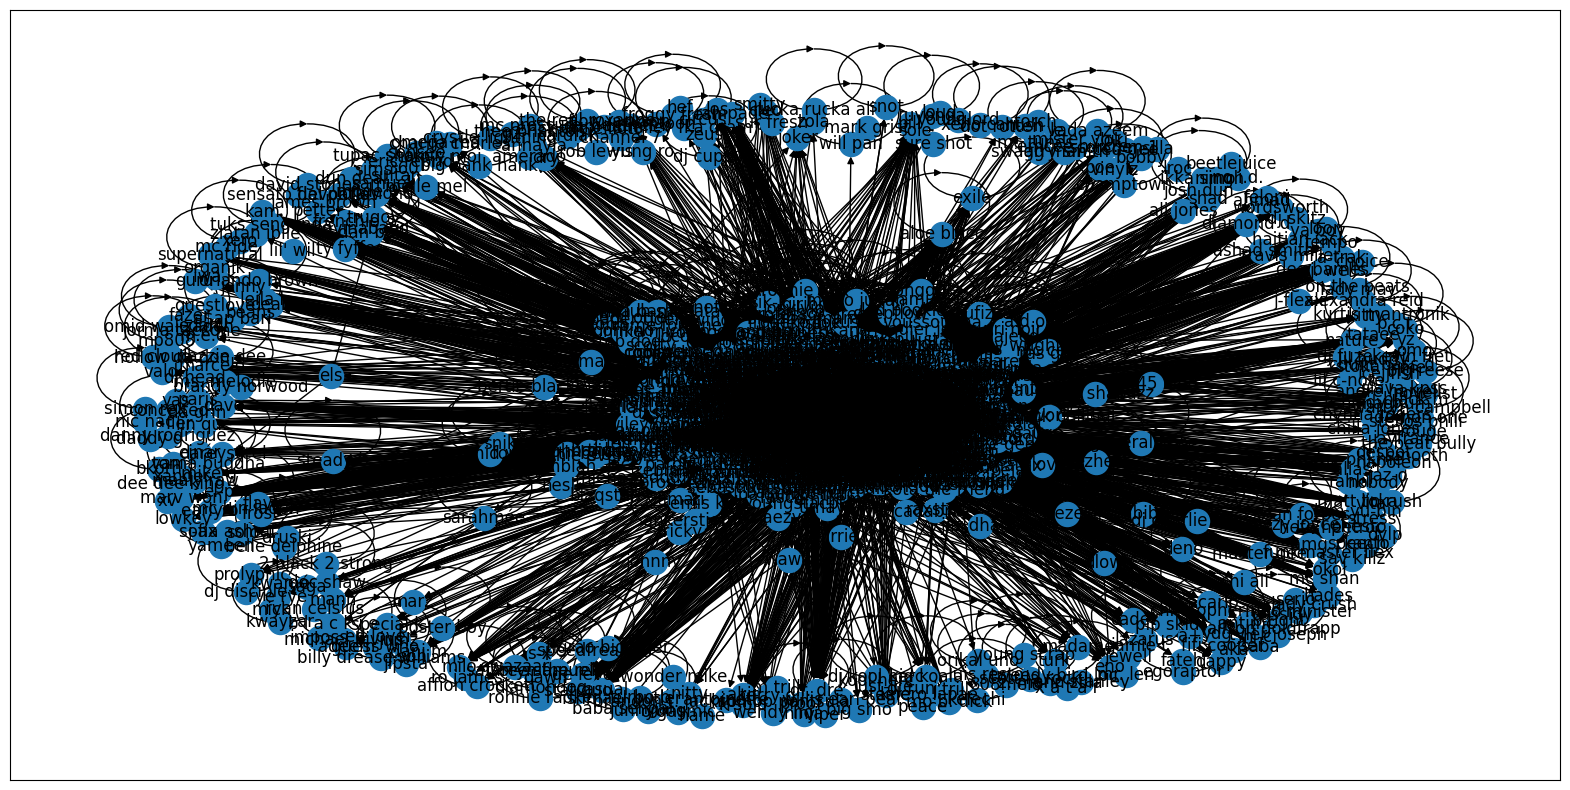

In [13]:
plt.figure(figsize=(20, 10))
nx.draw_networkx(
        G,
        pos=graph_pos)

In [10]:
# Analysing the lyrics that we have so far and adding the most used words by an artist as a node attribute
with codecs.open("C:/Users/difto/Desktop/lyrics.txt", 'r', "utf-8") as f:
    lyrics = json.load(f)

In [76]:
import nltk
from wordcloud import STOPWORDS

top_words = {}

for artist in lyrics:
    # Removing the stop words from the lyrics
    text = [w for w in lyrics[artist] if w not in STOPWORDS]

    # Creating the frequency distribution
    fdist = nltk.FreqDist(text)

    # Getting the most common words in the distribution
    words = {}
    results = fdist.most_common()
    for i in range(15):
        if i < len(results):
            (w, _) = results[i]
            words["word"+str(i)] = w#.replace("'", "")
        else:
            break
    if len(words)>0:
        top_words[artist] = words

In [77]:
top_words

{'snoop dogg': {'word0': 'yo',
  'word1': 'leave',
  'word2': 'niggas',
  'word3': 'got',
  'word4': 'alone',
  'word5': "ain't",
  'word6': 'know',
  'word7': 'eastside',
  'word8': 'nigga',
  'word9': 'crip',
  'word10': 'think',
  'word11': 'back',
  'word12': 'give',
  'word13': 'say',
  'word14': 'turn'},
 'lil wayne': {'word0': 'got',
  'word1': 'money',
  'word2': 'bitch',
  'word3': 'know',
  'word4': 'nigga',
  'word5': "ain't",
  'word6': 'yeah',
  'word7': 'fuck',
  'word8': 'cash',
  'word9': 'man',
  'word10': 'niggas',
  'word11': 'dont',
  'word12': 'tell',
  'word13': 'now',
  'word14': 'bitches'},
 'gucci mane': {'word0': 'nigga',
  'word1': 'got',
  'word2': 'gato',
  'word3': 'back',
  'word4': 'shit',
  'word5': 'now',
  'word6': 'gucci',
  'word7': 'bitch',
  'word8': 'think',
  'word9': 'know',
  'word10': 'niggas',
  'word11': 'might',
  'word12': "i'ma",
  'word13': 'go',
  'word14': "ain't"},
 'e-40': {'word0': 'got',
  'word1': 'im',
  'word2': 'bitch',
  'wor

In [78]:
G = nx.DiGraph()

exceptions = []
for artist in artist_data:
    G.add_node(artist)
    try:
        for featured_artist in artist_data[artist][2]:
            if featured_artist in artist_data and featured_artist != artist:
                G.add_edge(artist, featured_artist)
    except:
        exceptions.append(artist)
        
nx.set_node_attributes(G, top_words)

In [79]:
nx.nodes(G)["snoop dogg"]

{'word0': 'yo',
 'word1': 'leave',
 'word2': 'niggas',
 'word3': 'got',
 'word4': 'alone',
 'word5': "ain't",
 'word6': 'know',
 'word7': 'eastside',
 'word8': 'nigga',
 'word9': 'crip',
 'word10': 'think',
 'word11': 'back',
 'word12': 'give',
 'word13': 'say',
 'word14': 'turn'}

In [80]:
nx.write_gml(G, "gml_graph2.gml")